In [ ]:
## GT Account: mwhite315
## CS 7641: Machine Learning
## Unsupervised Learning and Dimensionality Reduction
## Dataset: Job Posts
# Description: Code to run 6 different Unsupervised Learning Algorithms
#
#

In [52]:
import numpy as np
import pandas as pd
import gensim
import cPickle as pickle
from sklearn.decomposition import FastICA
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import tree, model_selection, svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import graphviz
import matplotlib.pyplot as plt

In [37]:
## Load Dataset 2
# Seperate Data into Test and Train
tf = pd.read_csv('3_mwhite315/data/num_job_posts.csv')
pos_jobs = tf[tf['programming'] == 1]
neg_jobs = tf[tf['programming'] == 0].sample(n=1003)
data = pos_jobs.append(neg_jobs)
X = data.drop('programming', axis=1)
y = data['programming']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Export Test and Training Sets
X_train.to_csv('3_mwhite315/data/d2_x_train'+str()+'.csv', index=False)
X_test.to_csv('3_mwhite315/data/d2_x_test.csv', index=False)
y_train.to_csv('3_mwhite315/data/d2_y_train.csv', index=False)
y_test.to_csv('3_mwhite315/data/d2_y_test.csv', index=False)

In [77]:
# Neural Nets Original
# Create and Fit a Multi-Layer Perceptron Neural Network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
sca_train = scaler.transform(X_train)
sca_test = scaler.transform(X_test)

mlp = MLPClassifier()
mlp.fit(sca_train,y_train)

# Make predictions on unseen test data
m_pred = mlp.predict(sca_test)

# Print Results
print(confusion_matrix(y_test, m_pred))  
print(classification_report(y_test, m_pred))

from sklearn.decomposition import PCA

p_accuracy = []
a = accuracy_score(y_test, m_pred)
p_accuracy.append(a)

# Add PCA
for val in range(1,5):
    pca = PCA(val)
    pca.fit(sca_train)
    p_train = pca.transform(sca_train)
    p_test = pca.transform(sca_test)
    
    ## train neural network
    mlp = MLPClassifier()
    mlp.fit(p_train,y_train)
    
    # Make predictions on unseen test data
    p_pred = mlp.predict(p_test)
    

    # Catch Accuracy
    a = accuracy_score(y_test, p_pred)
    p_accuracy.append(a)

print p_accuracy
p_accuracy = p_accuracy[0], p_accuracy[4], p_accuracy[3], p_accuracy[2], p_accuracy[1]
print range(5)

[[129  68]
 [ 84 121]]
             precision    recall  f1-score   support

          0       0.61      0.65      0.63       197
          1       0.64      0.59      0.61       205

avg / total       0.62      0.62      0.62       402

[0.62189054726368154, 0.57711442786069655, 0.55472636815920395, 0.60199004975124382, 0.61940298507462688]
[0, 1, 2, 3, 4]


In [76]:
# Compute ICA
# Add ICA
l_accuracy = []
a = accuracy_score(y_test, m_pred)
l_accuracy.append(a)

for val in range(1,5):
    ica = FastICA(val)
    ica.fit(sca_train)
    i_train = ica.transform(sca_train)
    i_test = ica.transform(sca_test)
    
    ## train neural network
    mlp = MLPClassifier()
    mlp.fit(i_train,y_train)
    
    # Make predictions on unseen test data
    l_pred = mlp.predict(i_test)
    

    # Catch Accuracy
    a = accuracy_score(y_test, l_pred)
    l_accuracy.append(a)

print l_accuracy
l_accuracy = l_accuracy[0], l_accuracy[4], l_accuracy[3], l_accuracy[2], l_accuracy[1]
print range(5)

[0.62686567164179108, 0.50995024875621886, 0.5149253731343284, 0.51243781094527363, 0.49004975124378108]
[0, 1, 2, 3, 4]


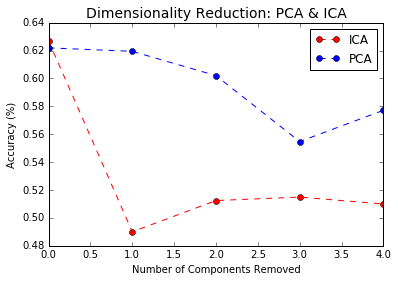

In [93]:
fig, ax = plt.subplots()
ax.plot(range(5), l_accuracy, c = "red", marker='o', linestyle='dashed', label = 'ICA')
ax.plot(range(5), p_accuracy, c = "blue", marker='o', linestyle='dashed', label = 'PCA')
ax.legend()
plt.title("Dimensionality Reduction: PCA & ICA", fontsize=14)
ax.set_xlabel("Number of Components Removed")
ax.set_ylabel("Accuracy (%)")
plt.savefig('pca_ica.png')
plt.show()


In [87]:
## Removing Features with Low Variance
from sklearn.feature_selection import VarianceThreshold

v_accuracy = []
a = accuracy_score(y_test, m_pred)
v_accuracy.append(a)

t_out = []

for val in range(1,5):
    thresh = val * .2
    var = VarianceThreshold(threshold=(thresh * (1 - thresh)))
    var.fit(sca_train)
    v_train = var.transform(sca_train)
    v_test = var.transform(sca_test)
    
    ## train neural network
    mlp = MLPClassifier()
    mlp.fit(v_train,y_train)
    
    # Make predictions on unseen test data
    v_pred = mlp.predict(v_test)
    

    # Catch Accuracy
    a = accuracy_score(y_test, v_pred)
    v_accuracy.append(a)
    t_out.append(thresh)

t_out.append(1)
print v_accuracy
print t_out

[0.62189054726368154, 0.61940298507462688, 0.63432835820895528, 0.61194029850746268, 0.60447761194029848]
[0.2, 0.4, 0.6000000000000001, 0.8, 1]


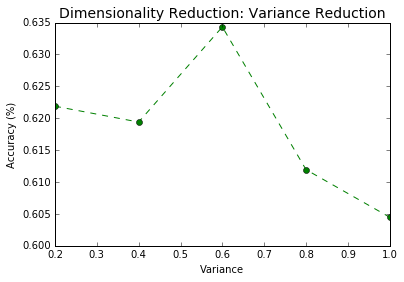

In [92]:
v = [.2,.4,.6,.8]
fig, ax = plt.subplots()
ax.plot(t_out, v_accuracy, c = "green", marker='o', linestyle='dashed')
plt.title("Dimensionality Reduction: Variance Reduction", fontsize=14)
ax.set_xlabel("Variance")
ax.set_ylabel("Accuracy (%)")
plt.savefig('var.png')
plt.show()

In [89]:
## Recursive Feature Elimination

from sklearn.svm import SVR
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel

svr = SVR(kernel="linear")
rfe = RFE(svr, 5, step=1)
rfe.fit(sca_train, y_train)
r_train = rfe.transform(sca_train)
r_test = rfe.transform(sca_test)

mlp = MLPClassifier()
mlp.fit(r_train,y_train)
    
# Make predictions on unseen test data
r_pred = mlp.predict(r_test)
    

# Catch Accuracy
accuracy_score(y_test, r_pred)

0.62189054726368154